In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np  

df = pd.read_csv("four-digit-pin-codes-sorted-by-frequency-withcount.csv", header=None, dtype={0: 'string'})
#We formatted the first column as string to avoid the string "0000" to be simplified as "0"
df.head()

,0,1
0,1234,255
1,1111,244
2,0000,221
3,1212,212
4,7777,203


## Our dataset is in the form "pin | occurrence"

In [8]:
df = df.sort_values(0) #Sort the dataset in numerical order so that we have all the number from 0 to 9999

pesi_df = (df[1] - df[1].min()) / (df[1].max() - df[1].min()) #Let's map each "occurrence" to a number in the interval [0,1] (MinMax normalization)
data_reshaped = pesi_df.values.reshape(100, 100) #Switch from a 1x10000 to a 100x100 array, where each index pair identifies the original 4-digit pin
df_reshaped = pd.DataFrame(data_reshaped) #Turn it into a Pandas DataFrame for easier manipulation
df_reshaped = np.transpose(df_reshaped) #Somehow the reshape function inverts the orientation of the original matrix, so we need to transpose it along the principal diagonal

In [9]:
# Verifying the size of the new DataFrame
print(df_reshaped.shape)  # Output: (100, 100)

# Show some of the elements in the DataFrame
print(df_reshaped.head())

(100, 100)
         0         1         2         3         4         5         6   \
0  0.866667  0.450980  0.407843  0.388235  0.356863  0.388235  0.352941   
1  0.631373  0.627451  0.501961  0.525490  0.498039  0.525490  0.505882   
2  0.498039  0.572549  0.596078  0.533333  0.533333  0.533333  0.501961   
3  0.466667  0.525490  0.556863  0.592157  0.498039  0.490196  0.494118   
4  0.454902  0.517647  0.541176  0.529412  0.564706  0.513725  0.556863   

         7         8         9   ...        90        91        92        93  \
0  0.380392  0.439216  0.443137  ...  0.513725  0.407843  0.419608  0.388235   
1  0.509804  0.490196  0.505882  ...  0.439216  0.349020  0.407843  0.333333   
2  0.494118  0.509804  0.486275  ...  0.392157  0.356863  0.341176  0.262745   
3  0.490196  0.494118  0.494118  ...  0.352941  0.321569  0.352941  0.337255   
4  0.529412  0.509804  0.517647  ...  0.372549  0.325490  0.349020  0.298039   

         94        95        96        97        98      

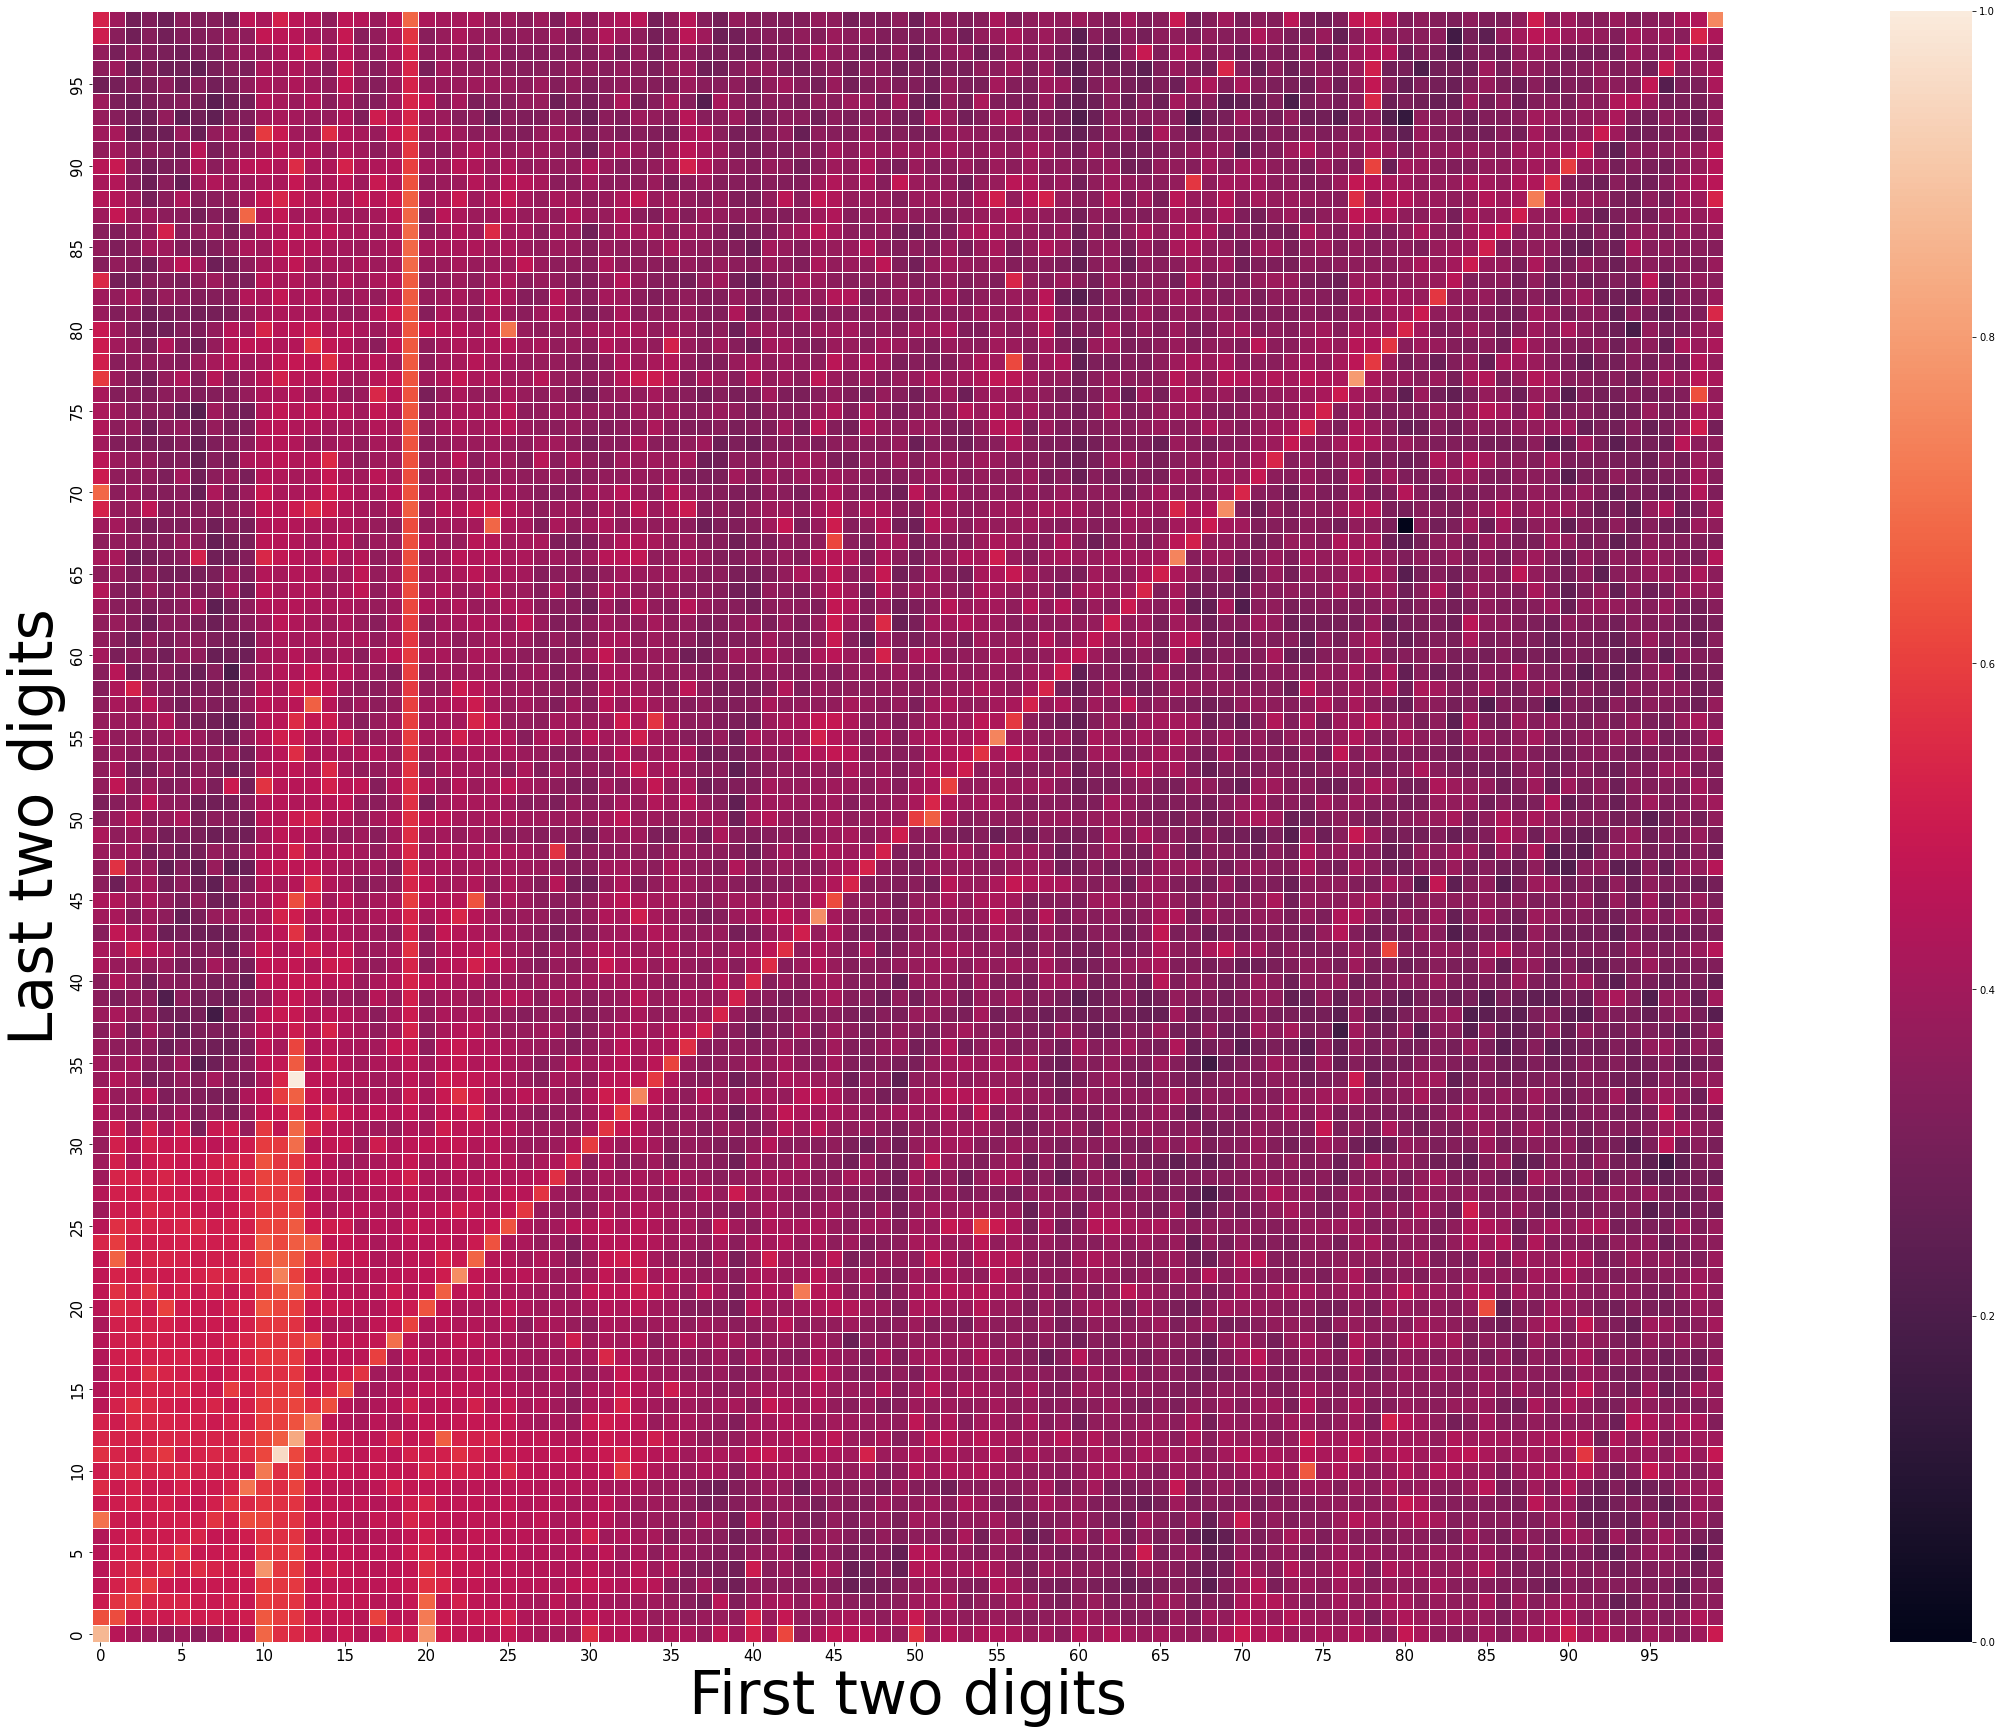

In [10]:
plt.figure(figsize=(60, 30)) #Create a new figure for the plot
ax = sns.heatmap(df_reshaped,square=True,linewidths=1,xticklabels=5, yticklabels=5) #The plot itself uses seaborn heatmap function. Changing the values here is purely for aesthetic reasons
plt.gca().invert_yaxis() #By default the y axis is represented in increasing order starting at the top. We want it to start at the bottom 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15) #Changing the font size of the x and y labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

ax.set_xlabel('First two digits',fontsize=60)
ax.set_ylabel('Last two digits',fontsize=60)
plt.savefig('foo1.png', bbox_inches='tight') #Save the graph...
plt.show() #...and show it!
